# Tensors, Functions and Computational graph
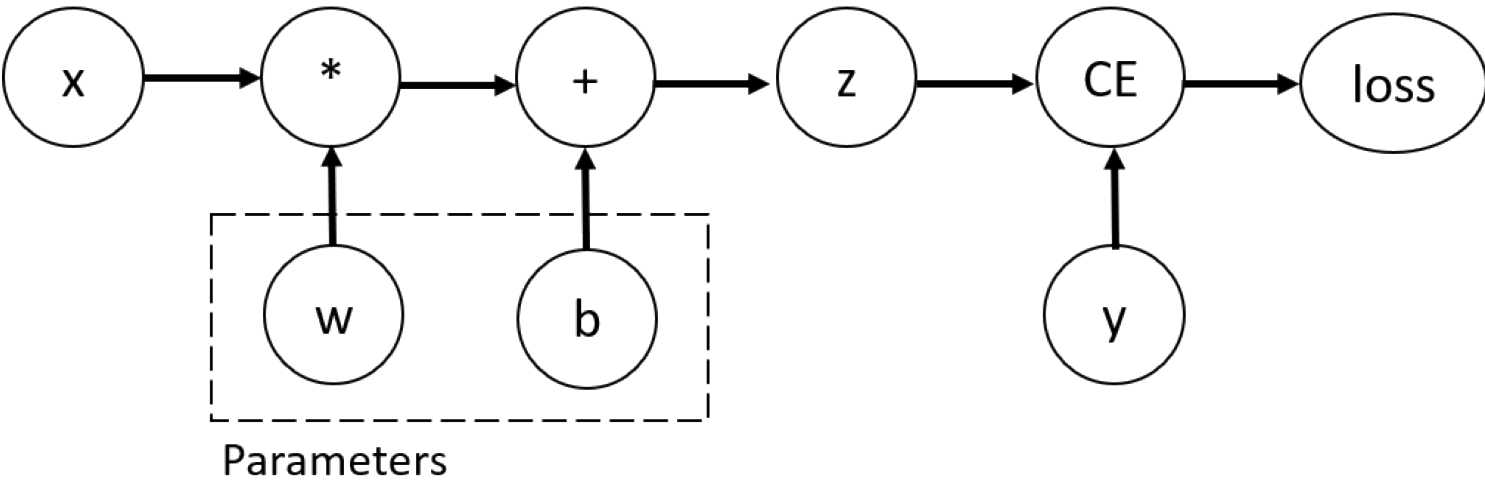

## torch.autograd
> `torch.autograd`는 신경망 학습을 지원하는 Pytorch의 자동 미분 엔진입니다. 

## 순전파

In [3]:
%matplotlib inline
import torch

x = torch.ones(5) # input tensor 
y = torch.zeros(3) # expected output 

# 처음의 w와 b 값은 랜덤하게 생성, 오차가 크게 발생 
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

z = torch.matmul(x, w)+b
# 예측 값 z와 실제 값 y 값의 차이를 엔트로피를 이용해 계산 
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [4]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7ff434073760>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7ff434073730>


# Computing gradients

## 역전파

In [5]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0987, 0.0622, 0.2175],
        [0.0987, 0.0622, 0.2175],
        [0.0987, 0.0622, 0.2175],
        [0.0987, 0.0622, 0.2175],
        [0.0987, 0.0622, 0.2175]])
tensor([0.0987, 0.0622, 0.2175])


# Disabling gradient tracking

In [7]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

# gradient tracking 없는 테스트 용, 학습 하지 않는 것으로 고정 
with torch.no_grad() :
    z = torch.matmul(x, w ) + b
print (z.requires_grad)

True
False


In [8]:
 # 더 이상 자동으로 gradient를 트래킹하지 않는다
 z = torch.matmul(x, w) + b
 z_det = z.detach()
 print(z_det.requires_grad)

False
